<a href="https://colab.research.google.com/github/anikareaza/prediction_model/blob/main/Heart_Disease_prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [ ]:
!pip install pyreadstat

In [10]:
df_fhs = pd.read_csv("framingham.csv")

In [ ]:
df_fhs.head()

In [ ]:
df_fhs.shape

In [ ]:
# col with less than 4240 entries is missing values
df_fhs.info()

In [ ]:
pd.set_option('display.float_format',lambda x: '%.3f' % x)
df_fhs.describe().transpose()
# end of data aquiring

In [ ]:
# data cleaning
df_fhs = df_fhs.drop(['education'], axis=1)
print(df_fhs.columns)

In [ ]:
df_fhs.shape

In [ ]:
# find missing value(T for missing val)
df_fhs.isnull()

In [17]:
# finding the pecentage of missing values in each col
df_fhs.isnull().sum()/len(df_fhs)*100

male              0.000
age               0.000
currentSmoker     0.000
cigsPerDay        0.684
BPMeds            1.250
prevalentStroke   0.000
prevalentHyp      0.000
diabetes          0.000
totChol           1.179
sysBP             0.000
diaBP             0.000
BMI               0.448
heartRate         0.024
glucose           9.151
TenYearCHD        0.000
dtype: float64

In [18]:
import missingno as msno

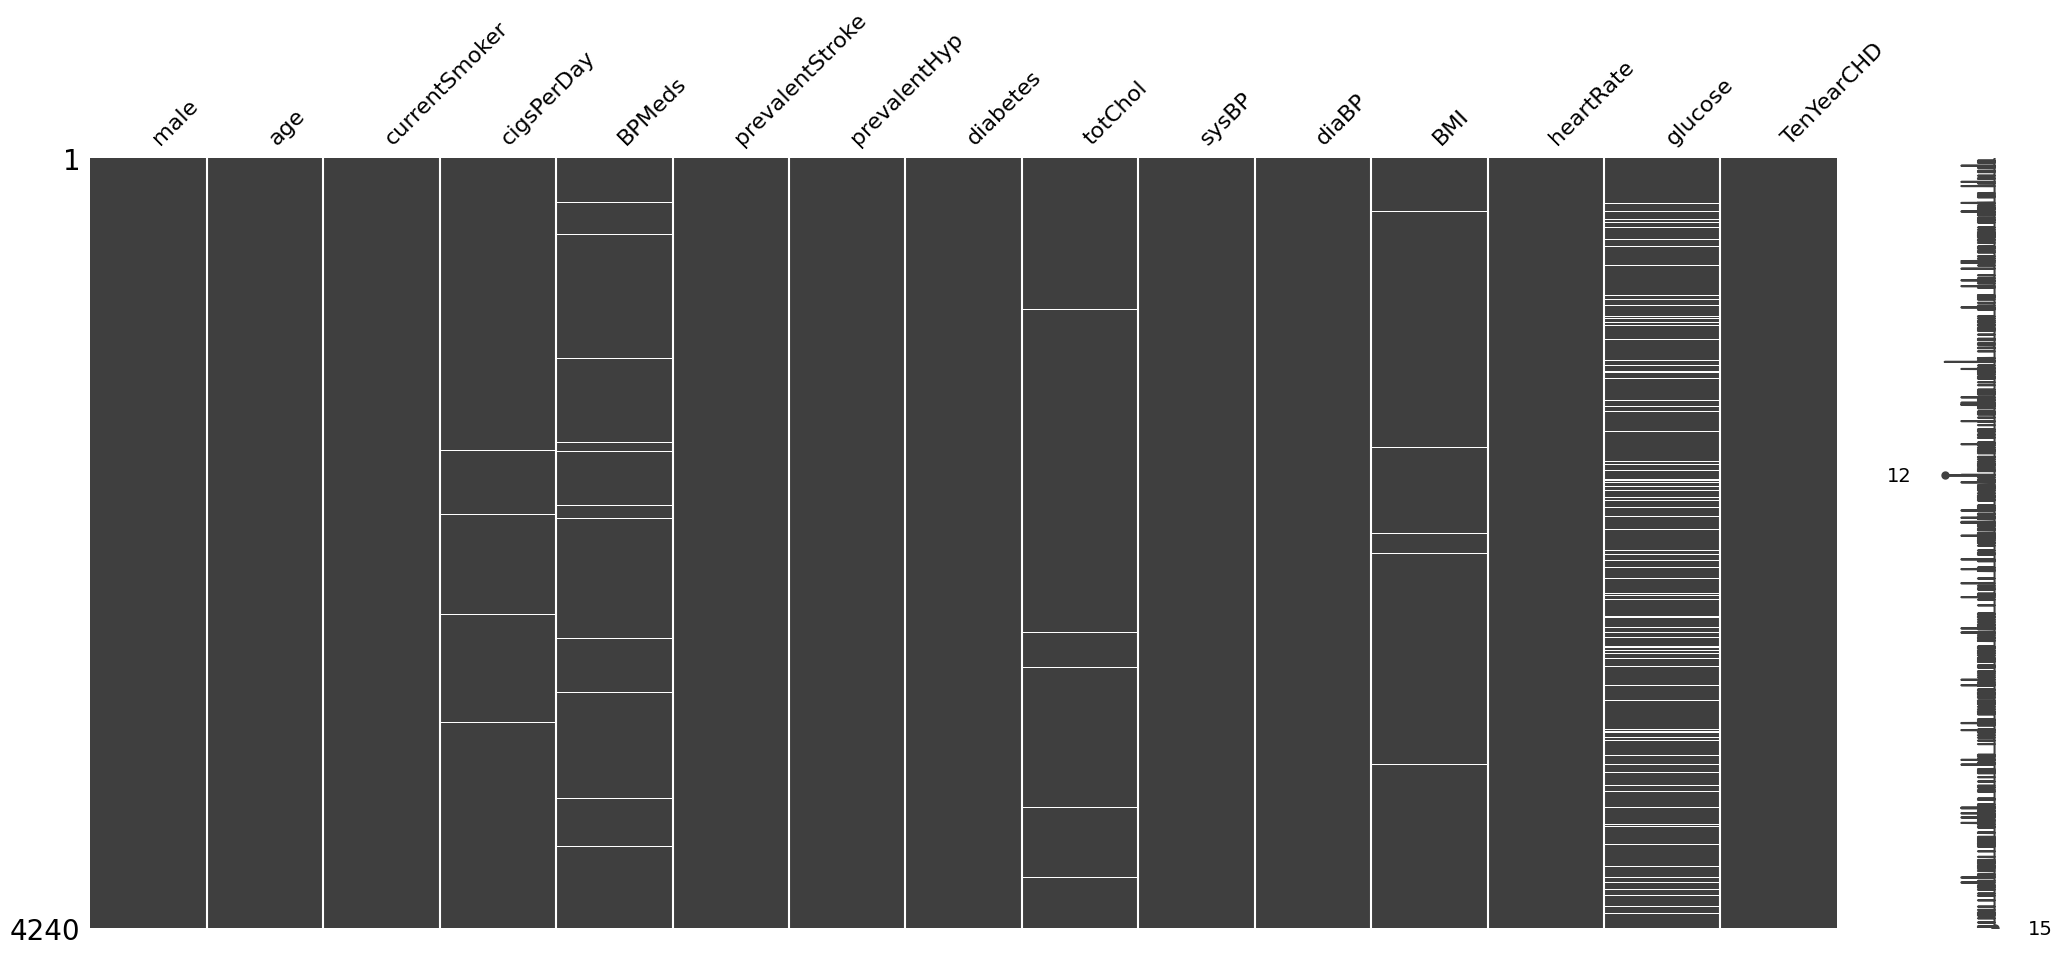

In [19]:
# alternative way to find missing values
msno.matrix(df_fhs)
plt.show()

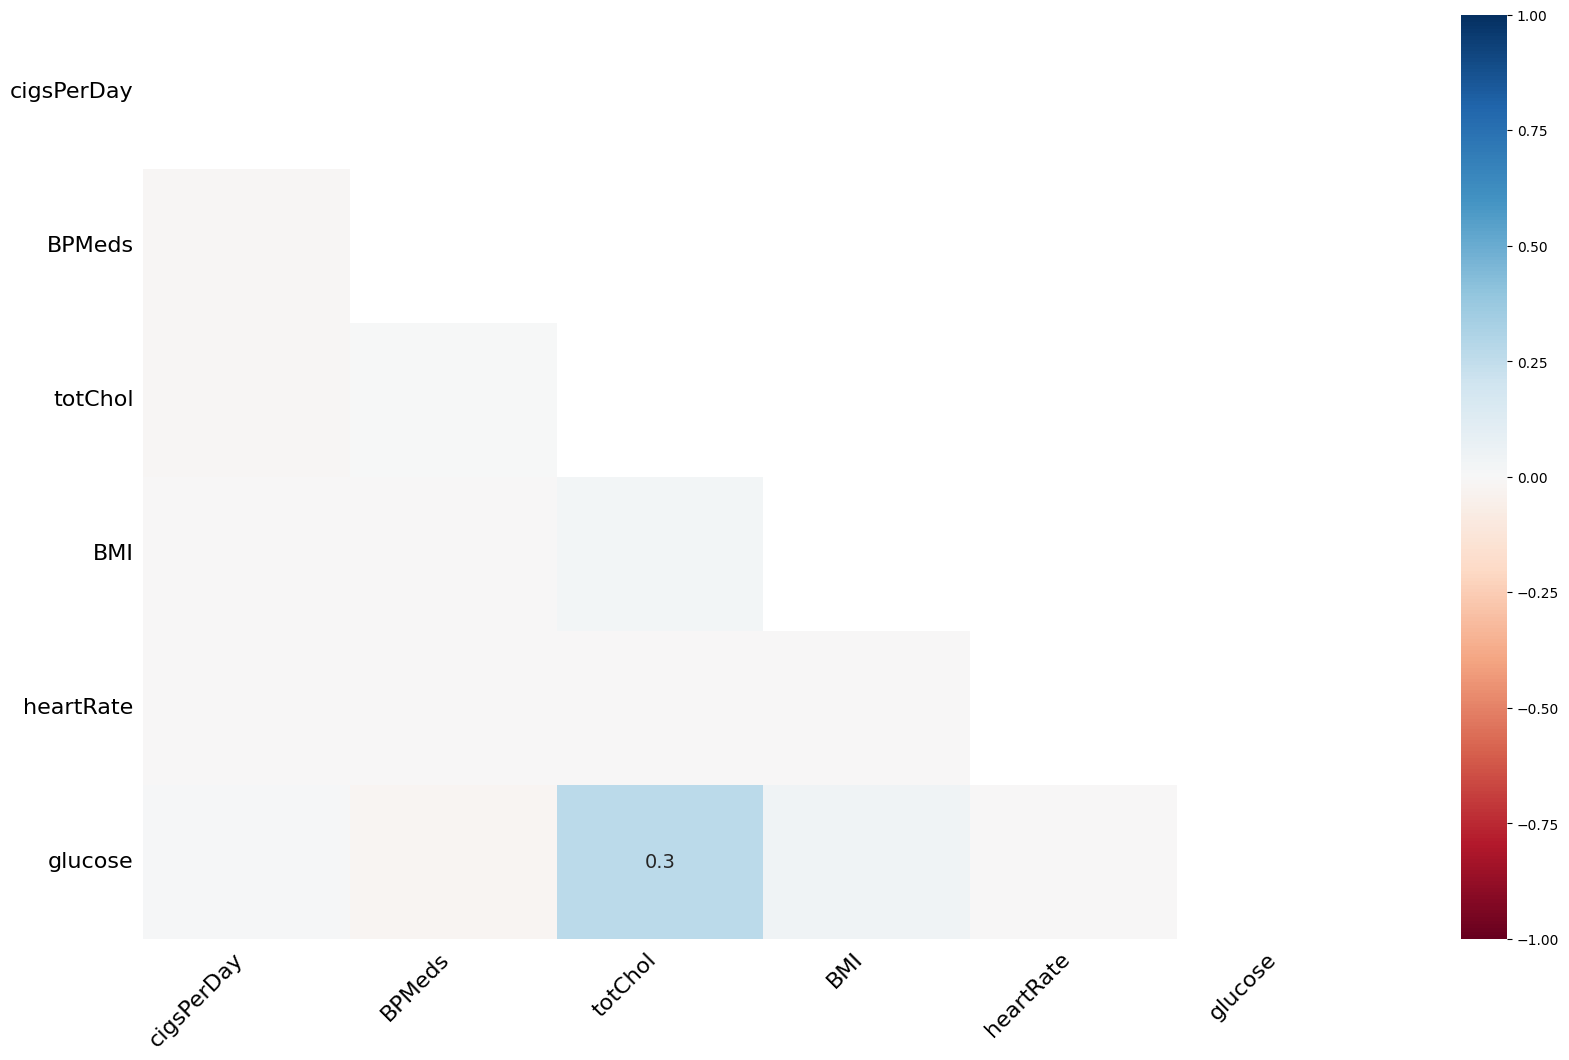

In [20]:
# correlation between col
import missingno as msno
msno.heatmap(df_fhs)
plt.show()

In [21]:
# replace missing value
df_fhs['cigsPerDay']=df_fhs['cigsPerDay'].fillna(df_fhs['cigsPerDay'].mean())
df_fhs['BPMeds']=df_fhs['BPMeds'].fillna(df_fhs['BPMeds'].mean())
df_fhs['totChol']=df_fhs['totChol'].fillna(df_fhs['totChol'].mean())
df_fhs['glucose']=df_fhs['glucose'].fillna(df_fhs['glucose'].mean())
df_fhs['BMI']=df_fhs['BMI'].fillna(df_fhs['BMI'].mean())

In [ ]:
(df_fhs.isnull().sum())*100/len(df_fhs)

In [23]:
df_fhs = df_fhs.dropna()

In [416]:
(df_fhs.isnull().sum())*100/len(df_fhs)

sex               0.000
age               0.000
currentSmoker     0.000
cigsPerDay        0.000
BPMeds            0.000
prevalentStroke   0.000
prevalentHyp      0.000
diabetes          0.000
totChol           0.000
sysBP             0.000
diaBP             0.000
BMI               0.000
heartRate         0.000
glucose           0.000
CHD               0.000
sex_cat           0.000
AgeGroup          0.000
dtype: float64

In [415]:
# check for row duplicates
df_fhs.duplicated().sum()

0

In [73]:
# remove duplicates if exist
# df_fhs.drop_duplicates(['subset'])

In [ ]:
# data exploration
df_fhs.info()

In [53]:
df_fhs = df_fhs.rename(columns={'TenYearCHD':'CHD'})

In [54]:
df_fhs = df_fhs.rename(columns={'target':'CHD'})
df_fhs['CHD'].value_counts(normalize=True)

0   0.848
1   0.152
Name: CHD, dtype: float64

<Axes: >

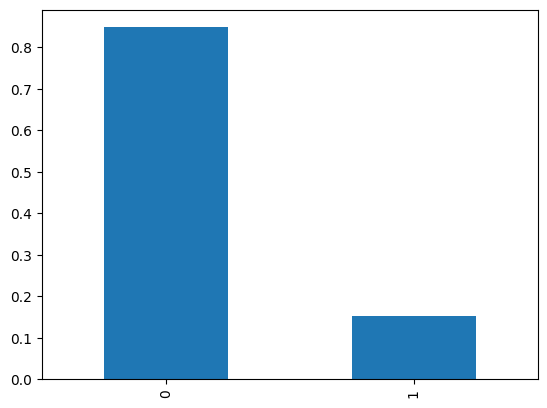

In [55]:
df_fhs['CHD'].value_counts(normalize=True).plot(kind='bar')

<Axes: xlabel='male'>

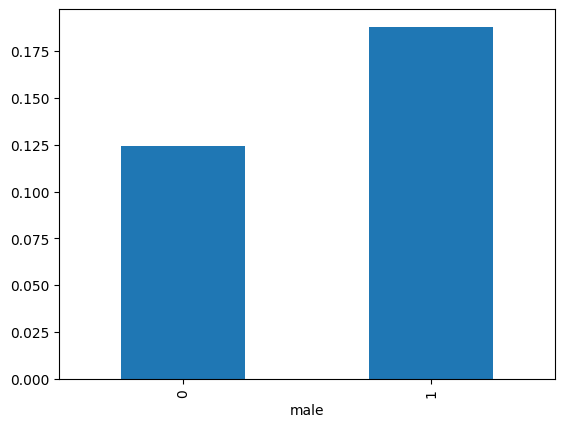

In [56]:
df_fhs.groupby('male')['CHD'].mean().plot(kind='bar')

In [ ]:
df_fhs.groupby('male').mean()

In [44]:
df_fhs['sex_cat'] = df_fhs['male'].replace([0, 1],['female','male'])

In [ ]:
df_fhs.groupby('sex_cat')['CHD'].mean()

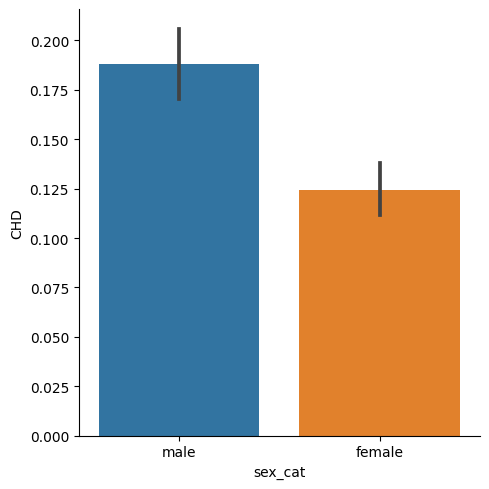

In [62]:
sns.catplot(data=df_fhs, y='CHD', x= 'sex_cat', kind='bar')

<Axes: xlabel='totChol', ylabel='sysBP'>

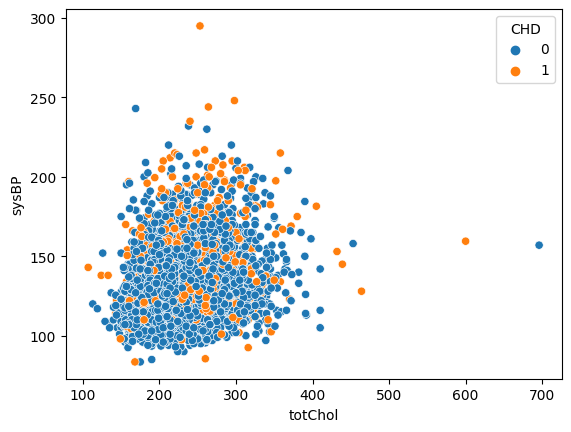

In [65]:
sns.scatterplot(data=df_fhs, y='sysBP', x= 'totChol', hue='CHD')

<Axes: xlabel='totChol', ylabel='sysBP'>

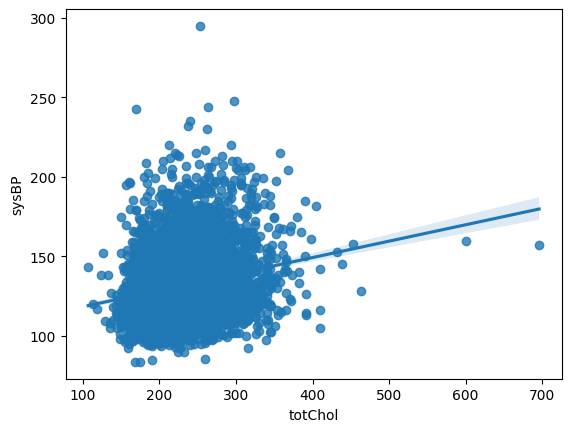

In [67]:
sns.regplot(data=df_fhs, y='sysBP', x= 'totChol')

In [ ]:
df_fhs.info()
df_fhs = df_fhs.rename(columns={'male':'sex'})

In [131]:
df_fhs.nunique().sort_values()
# df_fhs['age'].unique()
bins = [30, 40, 50, 60, 70, 80]  # Adjusted bins to cover the entire range of ages
labels = ['30-39', '40-49', '50-59', '60-69', '70+']  # Labels for each age group

df_fhs['AgeGroup'] = pd.cut(df_fhs['age'], bins=bins, labels=labels, right=False)



In [ ]:
col_int = df_fhs.nunique().reset_index()
col_int

In [132]:
col_int.columns=['features', 'categories']
col_int['categories'] =col_int['categories'].astype('int64')

In [ ]:
col_int = col_int.sort_values(by='categories')
col_int = col_int[col_int.categories<10]
col_int.features.values

In [ ]:
fhs_cat =df_fhs[col_int.features.values]
fhs_cat

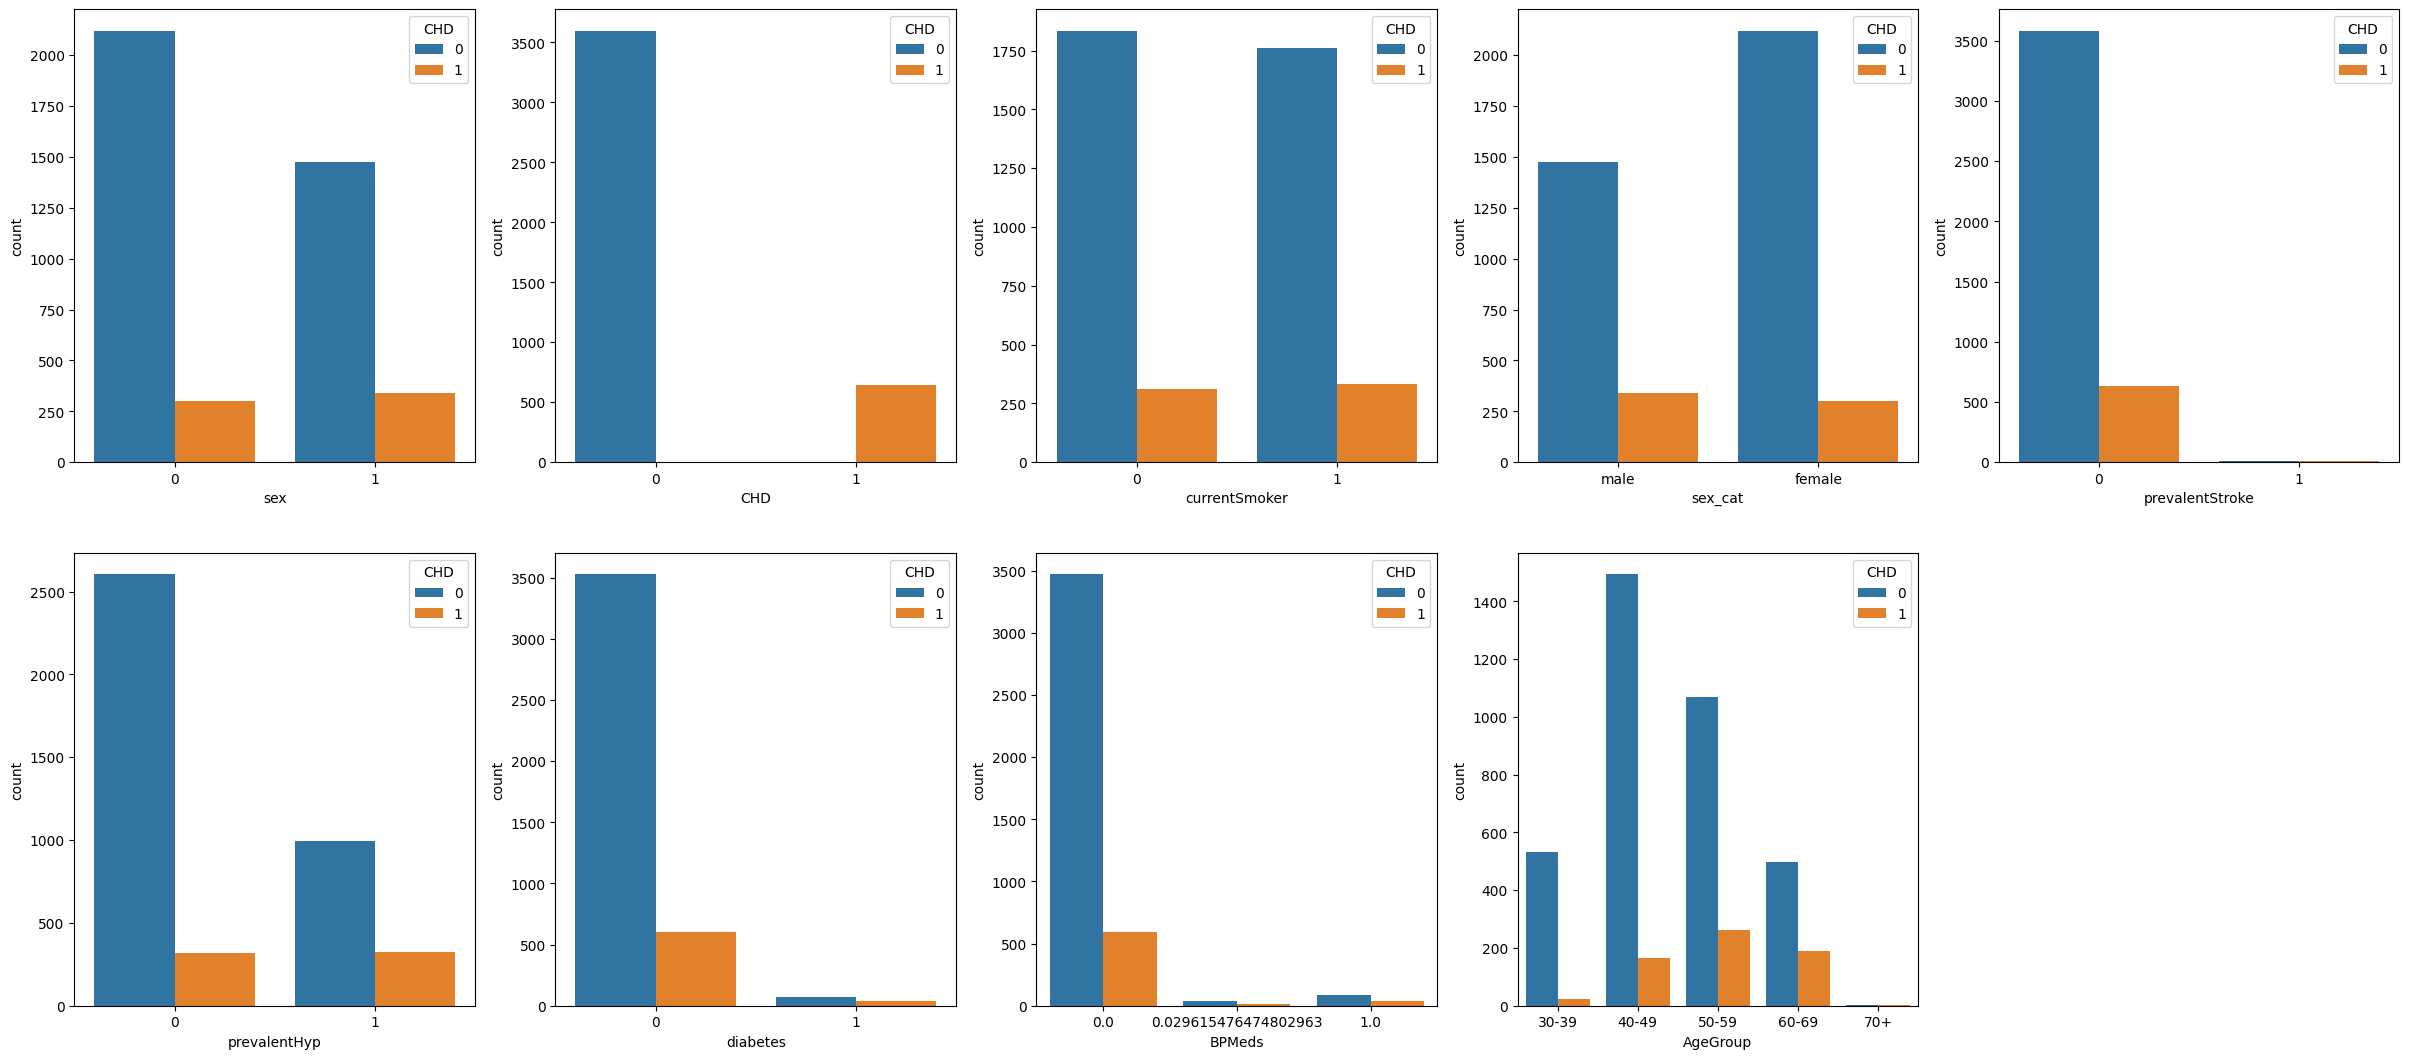

In [135]:
plt.figure(figsize=(30,20))
for i in enumerate(fhs_cat.columns):
  plt.subplot(3, 5, i[0]+1)
  sns.countplot(x=i[1], hue='CHD', data=fhs_cat)

In [ ]:
# filter out a subset of categorical var
fhs_cont = df_fhs.select_dtypes(include=['float'])
fhs_cont.info()

<Axes: >

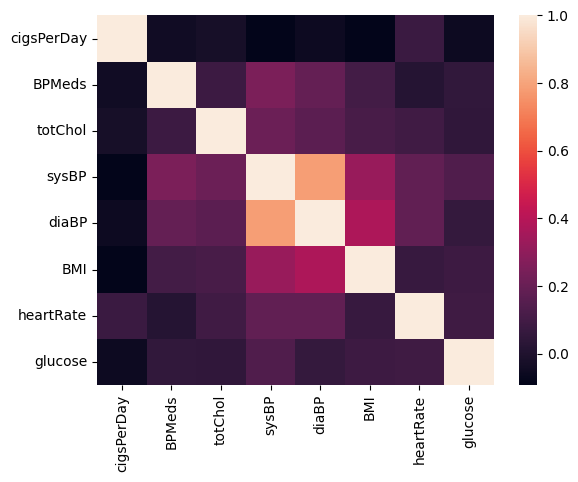

In [137]:
sns.heatmap(fhs_cont.corr())

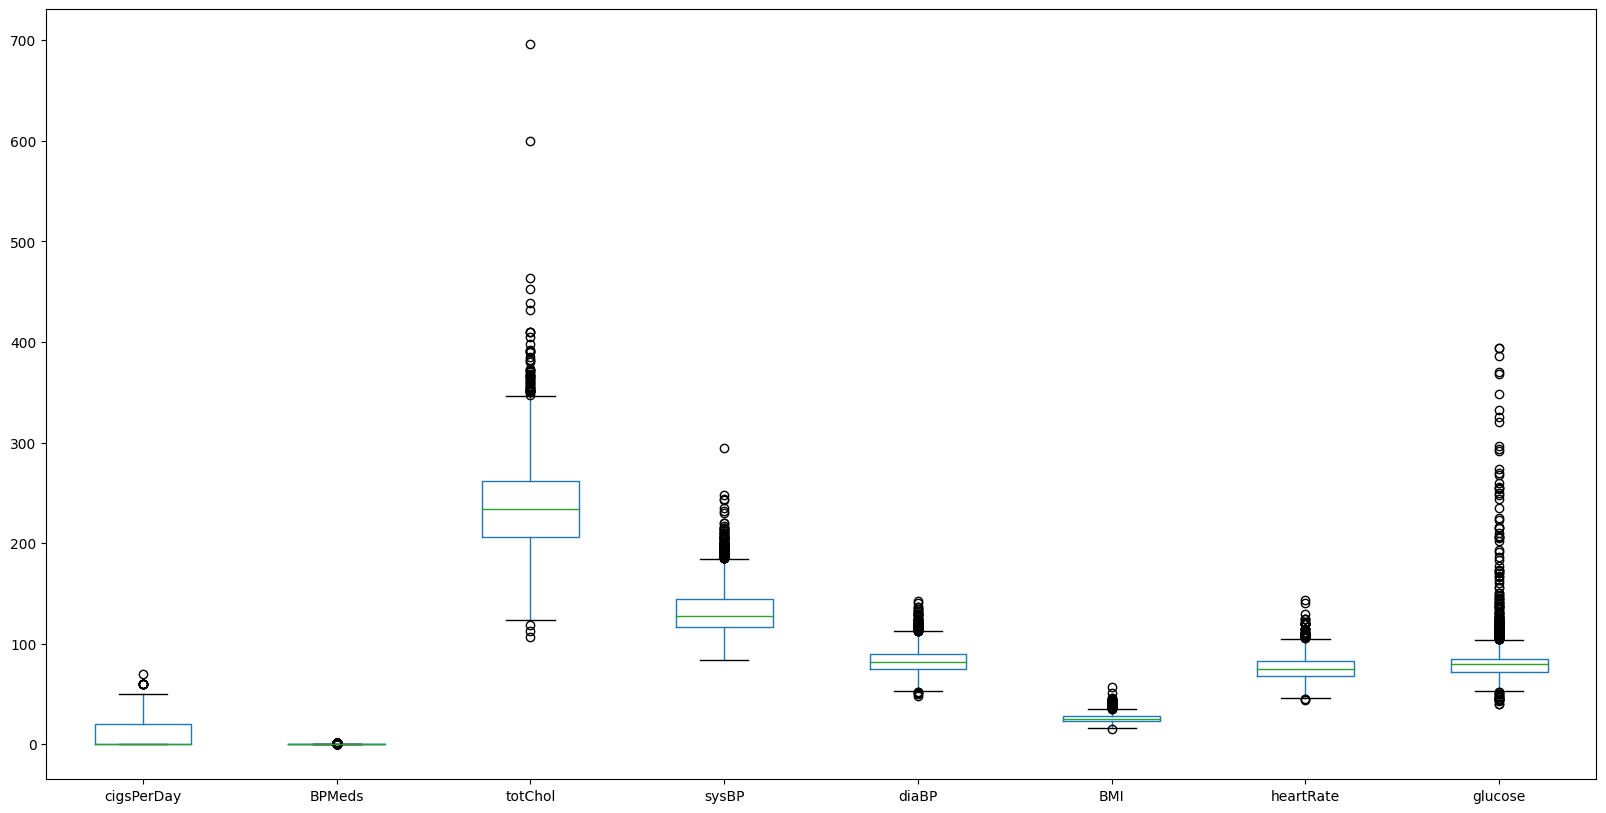

In [138]:
plt.figure(figsize=(20,10))
fhs_cont.boxplot(grid=False)
plt.show()

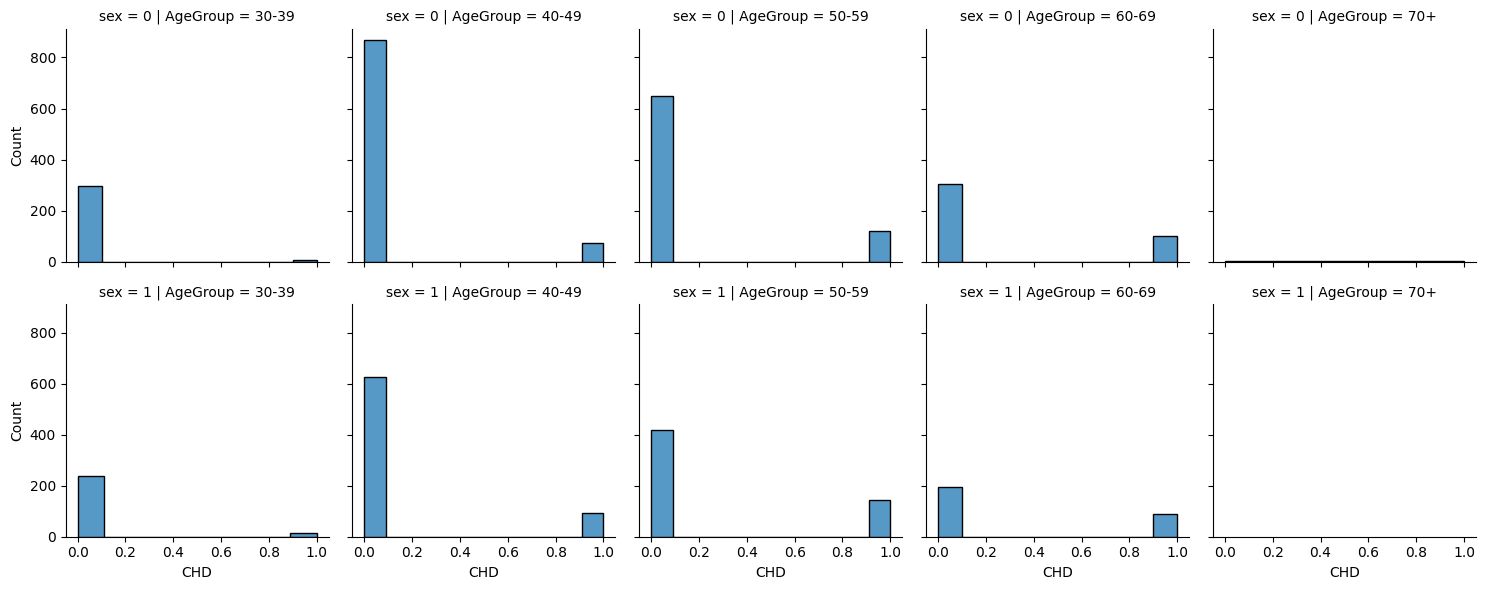

In [139]:
g =sns.FacetGrid(df_fhs,row='sex', col='AgeGroup')
g.map(sns.histplot, 'CHD')
plt.show()


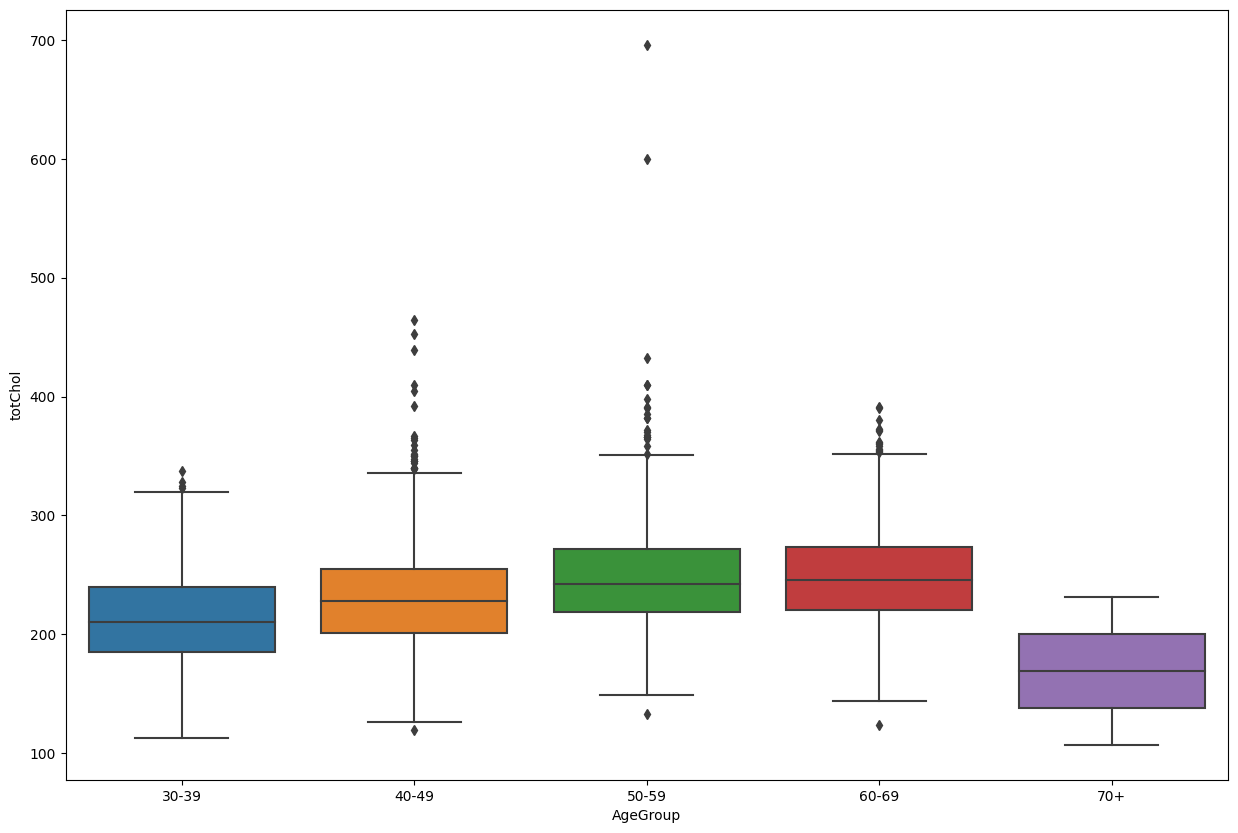

In [141]:
fig, ax =plt.subplots(figsize=(15,10))
sns.boxplot(data=df_fhs, x="AgeGroup", y="totChol", ax=ax)
plt.show()

In [ ]:
# target variable distribution
df_fhs['CHD'].value_counts(normalize=True)

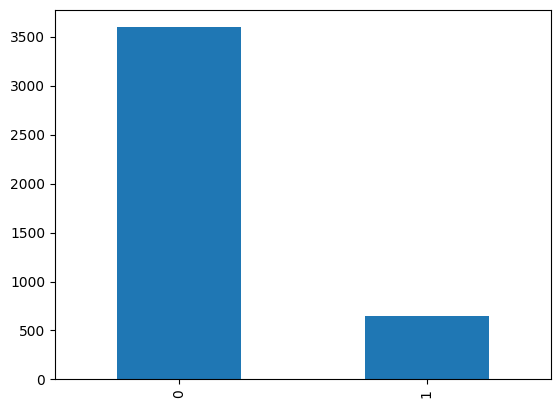

In [146]:
# visualize the distribution in target variable
df_fhs['CHD'].value_counts().plot(kind='bar')
plt.show()

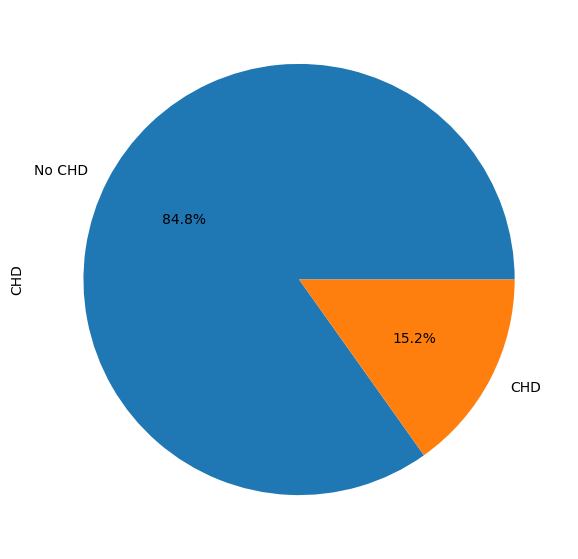

In [149]:
plt.figure(figsize=(10,7))
df_fhs['CHD'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['No CHD', 'CHD'])
plt.show()

In [ ]:
# 1st split the data
x= fhs_cont
x.shape

In [ ]:
y=df_fhs['CHD']
y.shape

In [371]:
# SMOTE the variables
from imblearn.over_sampling import SMOTE

In [372]:
# create test and train and SMOTE the x matrices
os =SMOTE(random_state=0)
x_os, y_os =os.fit_resample(x, y)

In [ ]:
# dimension of the matricies
x_os.shape, y_os.shape

In [ ]:
# distribution of categories of target variable(normalized the data)
y_os.value_counts(normalize=True)

In [375]:
# 2nd split(train and test)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_os, y_os, test_size=0.3, random_state=0)


In [376]:
# scalling the values for optimal model performance
from sklearn.preprocessing import StandardScaler
sc_train = StandardScaler().fit(x_train)
x_train_sc = sc_train.transform(x_train)


In [ ]:
# # print the transform data
np.set_printoptions(precision=3)
print(x_train_sc[0:5,:])

In [378]:
# training the model
# create an instance of Logistic Regression Model
model_lr = LogisticRegression(solver='liblinear')

In [379]:
# use the train data to train the model features
model_lr.fit(x_train_sc, y_train)

LogisticRegression(solver='liblinear')

In [380]:
# testing the model
# scale the test data
sc_test = StandardScaler().fit(x_test)
x_test_sc = sc_test.transform(x_test)

In [ ]:
# test the performance of the model on the test data
res = model_lr.score(x_test_sc, y_test)
res*100

In [ ]:
# test the performance of the model on the train data
res = model_lr.score(x_train_sc, y_train)
res*100

In [ ]:
# Model optimization
fhs_cont.info()

In [ ]:
df_fhs.info()

In [408]:
fhs_cont['diabetes']= df_fhs['diabetes']
fhs_cont['currentSmoker']= df_fhs['currentSmoker']
fhs_cont['sex ']= df_fhs['sex']
fhs_cont['age']= df_fhs['age']

In [409]:
fhs_cont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4239 entries, 0 to 4239
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cigsPerDay     4239 non-null   float64
 1   BPMeds         4239 non-null   float64
 2   totChol        4239 non-null   float64
 3   sysBP          4239 non-null   float64
 4   diaBP          4239 non-null   float64
 5   BMI            4239 non-null   float64
 6   heartRate      4239 non-null   float64
 7   glucose        4239 non-null   float64
 8   diabetes       4239 non-null   int64  
 9   currentSmoker  4239 non-null   int64  
 10  sex            4239 non-null   int64  
 11  age            4239 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 430.5 KB


In [388]:
# separate array into input x and output y components
x1 = fhs_cont
x1.shape

(4239, 12)

In [389]:
# create the outcome matrix
y1 = df_fhs['CHD']
y1.shape

(4239,)

In [390]:
# create test and train and SMOTE the x matrices
os = SMOTE(random_state=0)
x_os, y_os =os.fit_resample(x1,y1)

In [391]:
# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x_os, y_os, test_size=0.3, random_state=0)

In [392]:
lr_1 =LogisticRegression(solver='liblinear')

In [393]:
# scaling the features for optimal model performance
sc_train = StandardScaler().fit(x_train)
x_train_sc = sc_train.transform(x_train)

In [394]:
# use the train data to train the model features
lr_1.fit(x_train_sc, y_train)

LogisticRegression(solver='liblinear')

In [395]:
sc_test = StandardScaler().fit(x_test)
x_test_sc = sc_test.transform(x_test)

In [396]:
# test the performance of the model on the test data
res = lr_1.score(x_test_sc, y_test)
res*100

68.30398517145505

In [397]:
# test the performance of the model on the train data
res = lr_1.score(x_train_sc, y_train)
res*100

67.38180373460469

              precision    recall  f1-score   support

           0       0.68      0.69      0.68      1072
           1       0.69      0.68      0.68      1086

    accuracy                           0.68      2158
   macro avg       0.68      0.68      0.68      2158
weighted avg       0.68      0.68      0.68      2158



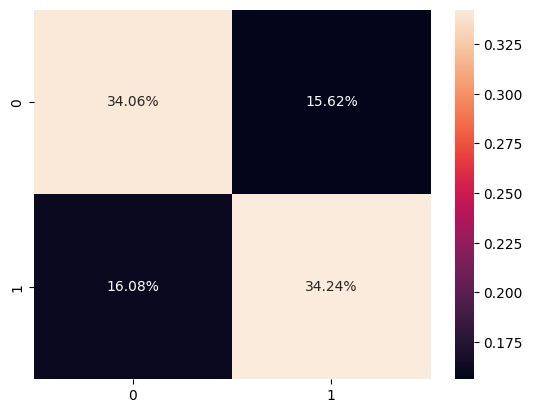

In [413]:
# confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
pred_y =lr_1.predict(x_test_sc)
matrix =confusion_matrix(y_test,pred_y)
sns.heatmap(matrix/np.sum(matrix), fmt='.2%', annot=True)
# classification report
report = classification_report(y_test, pred_y)
print(report)

In [ ]:
# lsit of feautures
features =list(fhs_cont.columns)
features

In [ ]:
# list of coefficiencts
coefficients = lr_1.coef_
# list of coeffiecient from the model
coefficients = coefficients.ravel().tolist()
coefficients

In [ ]:
# table of the coefficient and features name
data = {'Features':features,
        'coefficients':coefficients}
coeff_table = pd.DataFrame(data)
coeff_table = coeff_table.sort_values(by='coefficients')
coeff_table

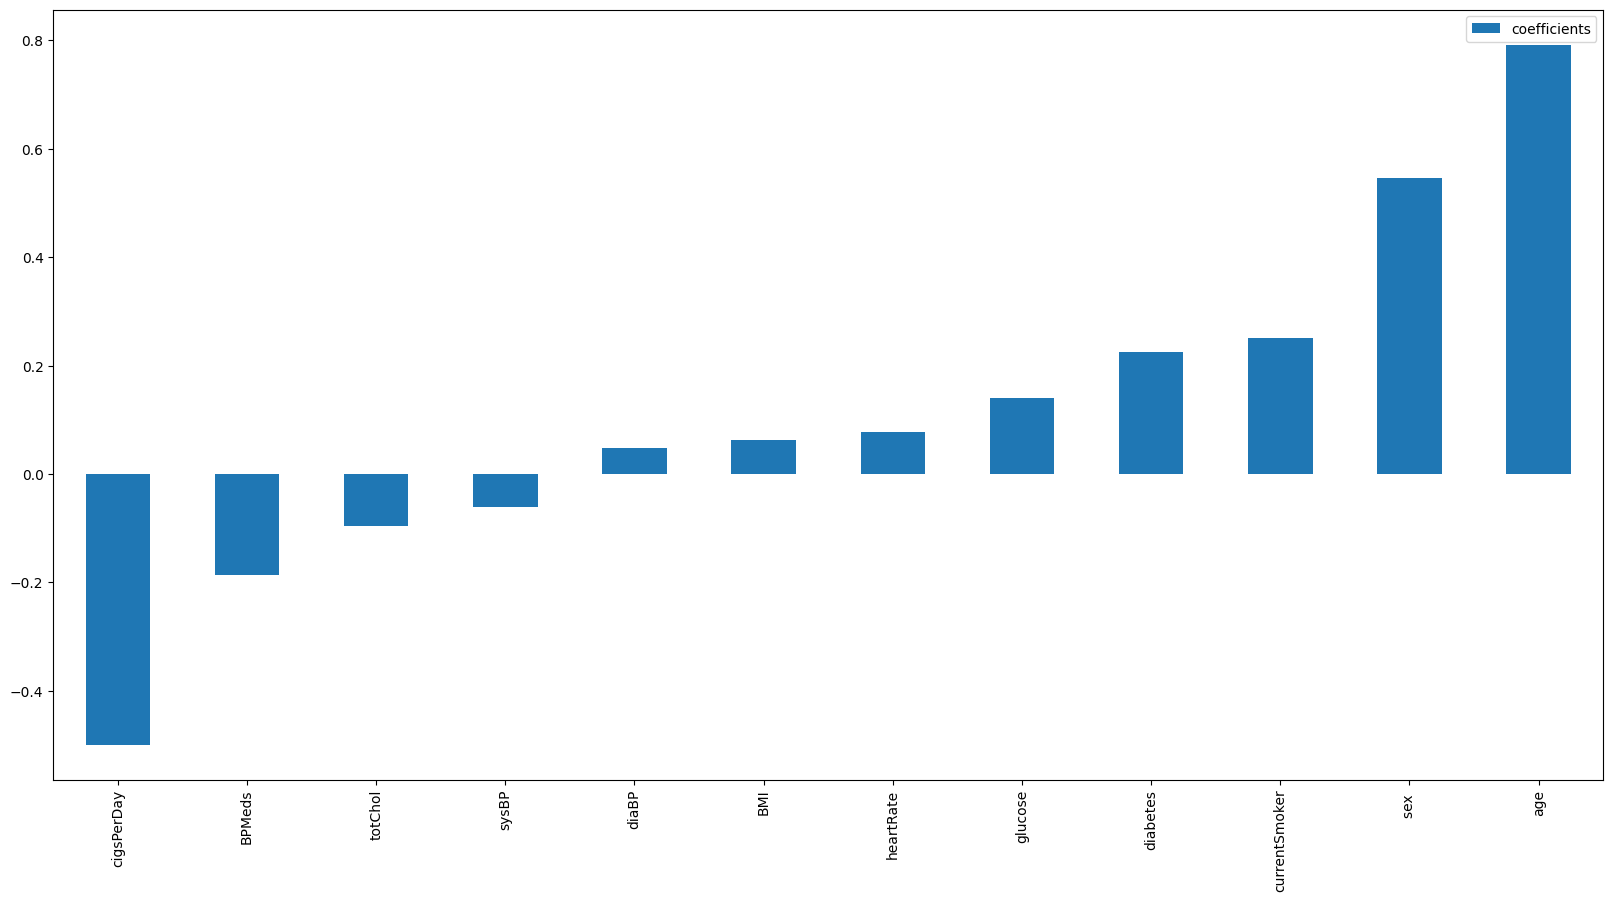

In [411]:
coeff_table.plot(kind='bar', figsize=(20,10))
plt.xticks(np.arange(0,12),features)
plt.show()